<a href="https://colab.research.google.com/github/Ujjawal360/ML-framingham/blob/main/ujjawalshah_ML_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project

In [ ]:
# upload the framingham.csv file locally to google drive

from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
# importing the necessary package

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()     # we will be using seaborn style plotting

In [ ]:
# first step is to read the csv file as a Pandas Dataframe

framingham = pd.read_csv('/content/framingham.csv')

In [ ]:
# show the first five rows of the dataframe

framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
framingham.isnull().sum()        # shows the total number of null values in each columnn

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# showing the summary statistics of the data

framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
'''we replace the null values in the dataframe columns with the respective median of the column.
   inplace=True modifies the DataFrame in place (do not create a new object) 
   i.e we are modifing the original dataframe rather than creating a new one'''
# we prefer median over the mean because it is not affected by the outliers and therefore doesn't skew the data

framingham.fillna(framingham.median(), inplace=True)

In [ ]:
#check whether the column are still null or not
print(framingham.any().isnull())

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool


**Next task is to create a Feature matrix and Target array.** 

In [ ]:
# creating Feature matrix(n_sample, n_features)

X_framingham = framingham.drop('TenYearCHD', axis=1)
X_framingham.shape

(4238, 15)

In [ ]:
# creating Target array

y_framingham = framingham['TenYearCHD']
y_framingham.shape

(4238,)

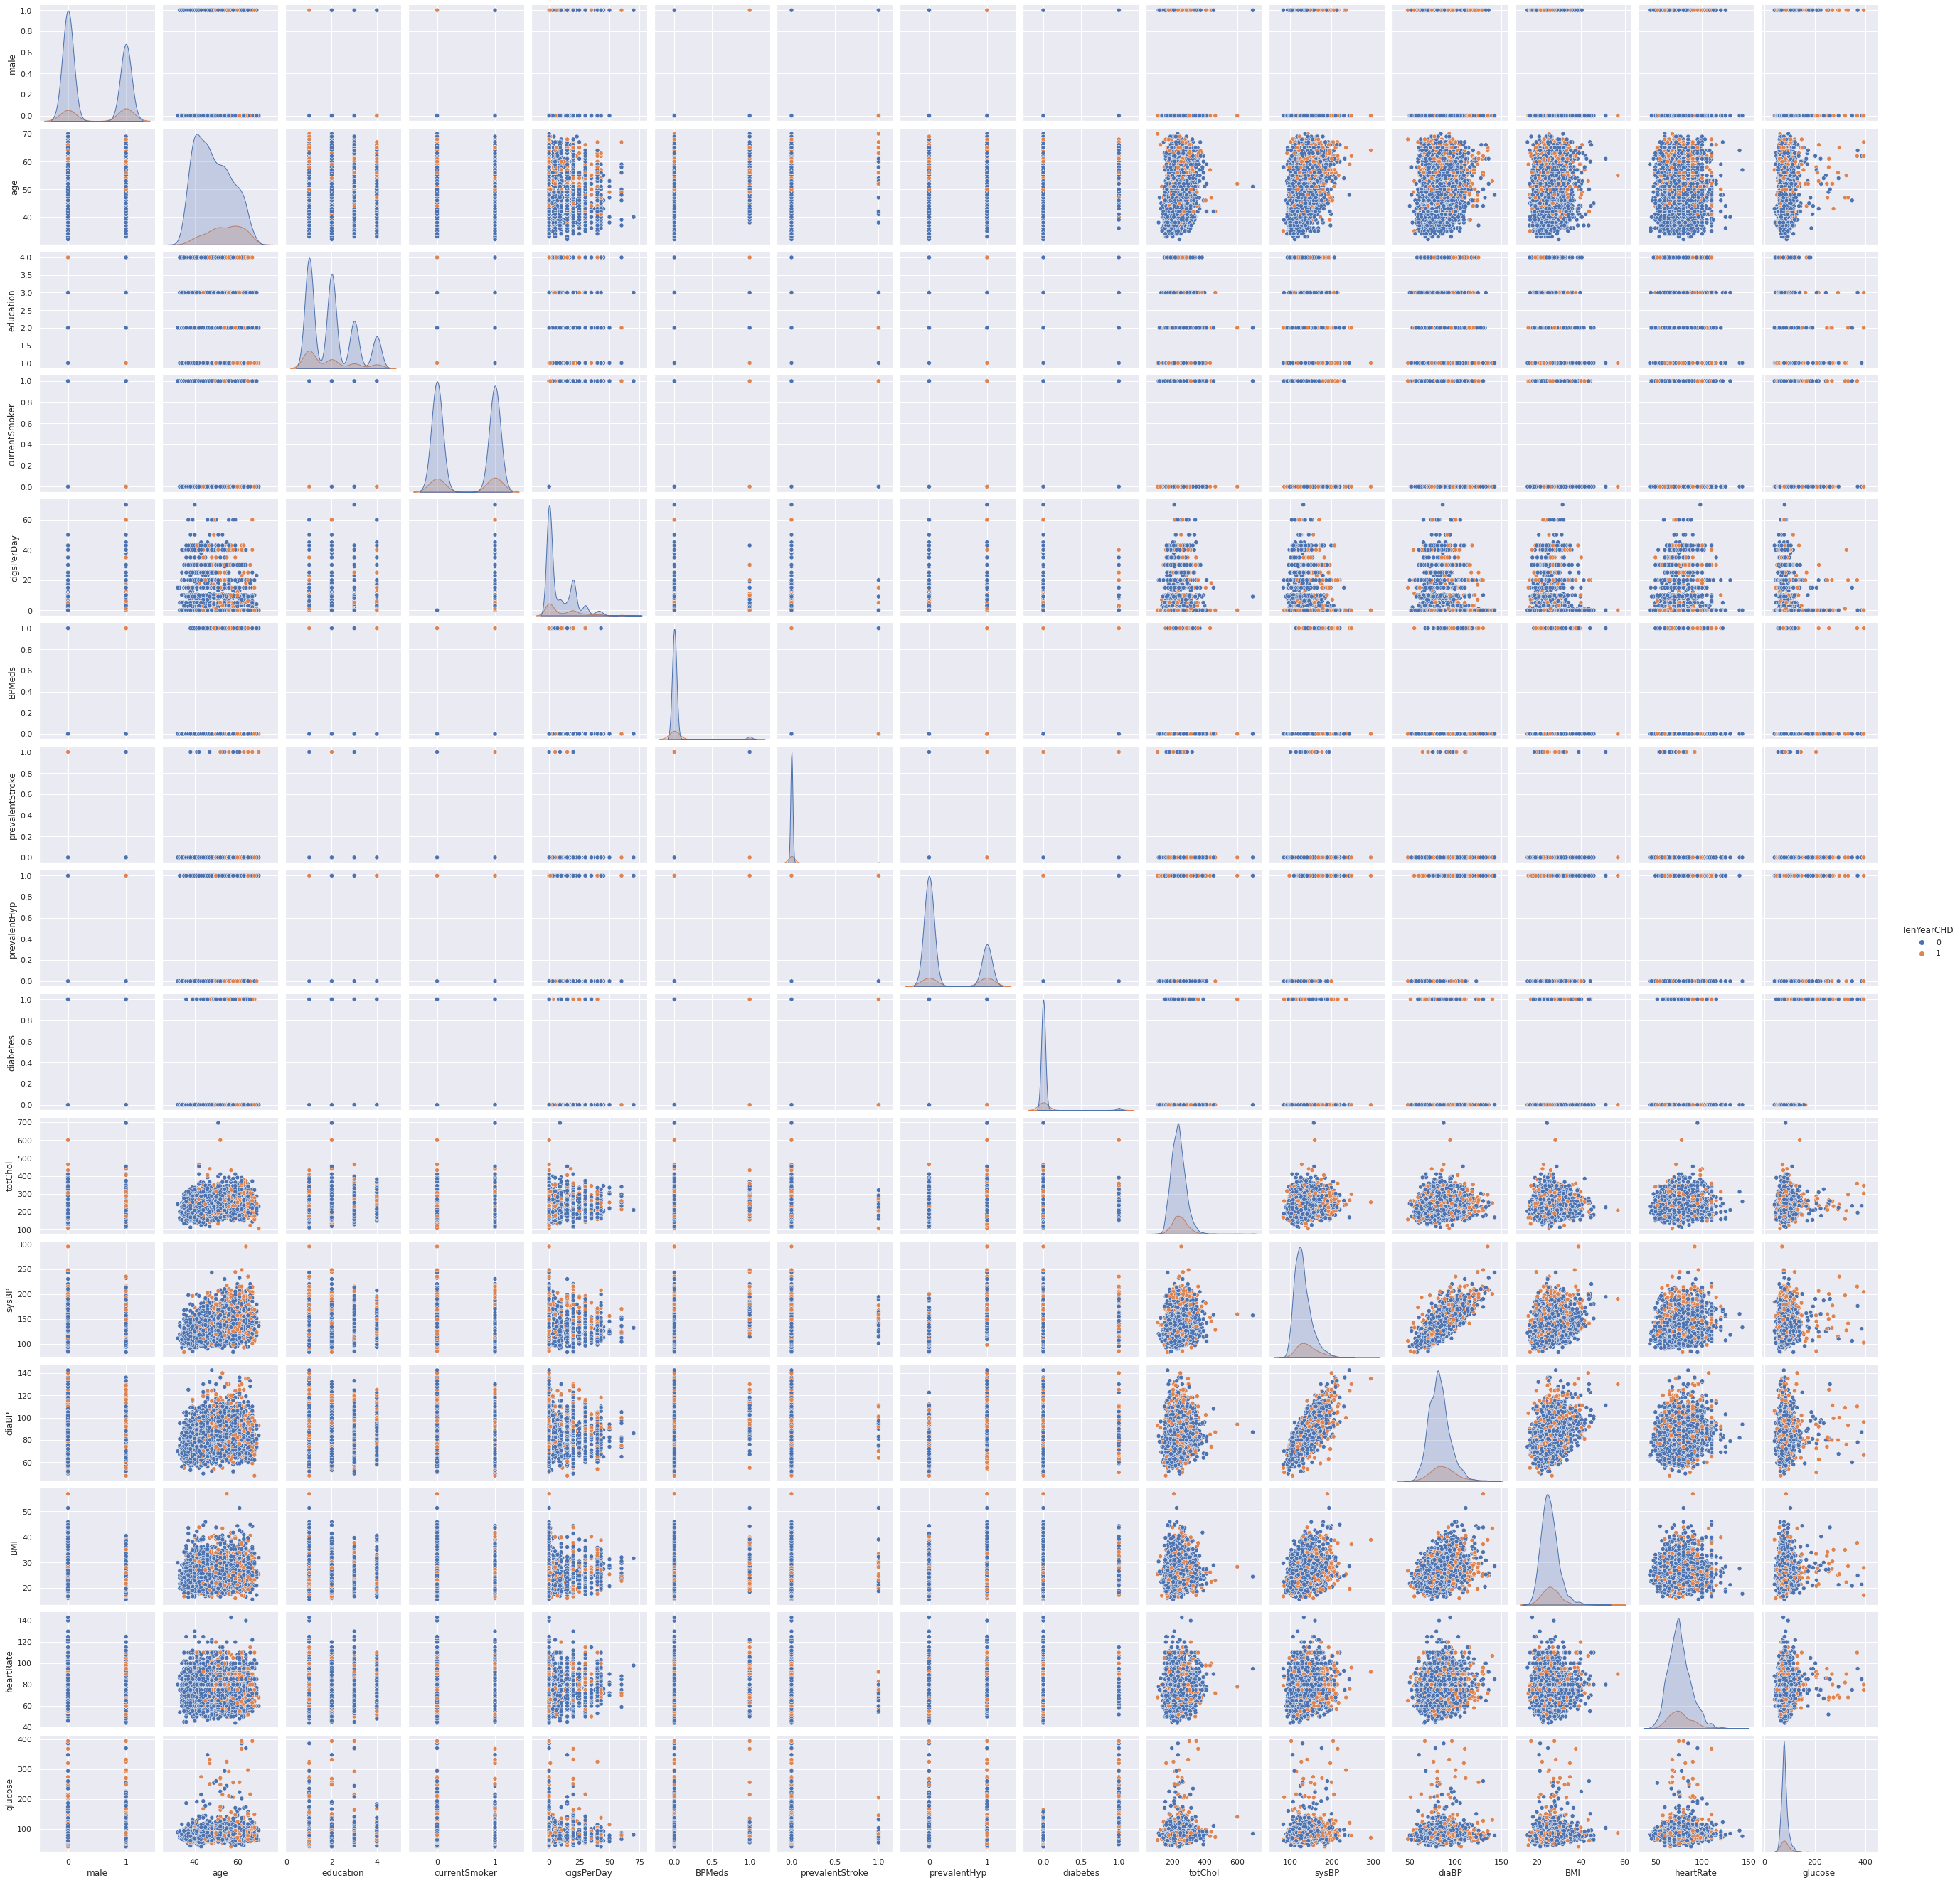

In [ ]:
# creating a pairplot of the features
sns.pairplot(framingham, hue='TenYearCHD' , height=2.5 );

In [ ]:
# importing the necessary package, models and algorithms

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
# Splitting the dataset into the Training set and Test set
# training size set to 75% of dataset

X_train, X_test, y_train, y_test = train_test_split(X_framingham, y_framingham,
                                                random_state=1 , train_size=0.75)

###Naive Bayes Model

In [ ]:
# CREATING A BASELINE MODEL
# using Naive Bayes algorithm as a base ML model

model = GaussianNB()                  # instantiation of Naive Bayes model
model.fit(X_train, y_train)           # fit data to the model
y_prediction = model.predict(X_test)  # prediction of label for unknown data 
accuracy_score(y_test, y_prediction)  # calculate the accuracy score of this model

0.8264150943396227

**Now let's look at the classification report and the confusion matrix:**

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       915
           1       0.29      0.19      0.23       145

    accuracy                           0.83      1060
   macro avg       0.58      0.56      0.56      1060
weighted avg       0.80      0.83      0.81      1060



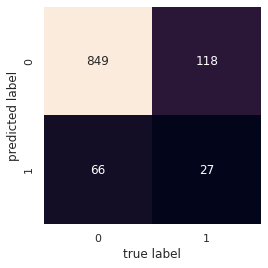

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Without any hyperparameter tuned, using Naive Bayes model gave us a whooping accuracy of 82.64% which is pretty good**. We now move forward looking to increase this accuracy.

#Support Vector Machine

In [ ]:
# we choose the default hyperparameter setting for now and observe the accuracy for it

model = SVC()                         # instantiation of Support Vector Machine model with default hyperparameter setting
model.fit(X_train, y_train)           # fit data to model
y_prediction = model.predict(X_test)  # predict the label for unknown data
accuracy_score(y_test, y_prediction)  # calculate the accuracy score of this model

0.8632075471698113

**Using the default model settings we got accuracy of 86.32%, an increase of 3.68% from the Naive Bayes model.**

**->Now, let's see the default hyperparameter setting it used:**

In [ ]:
model.get_params()      #these are the hyperparameter setting the model used as default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**We now see the classification report of the model:**

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       915
           1       0.00      0.00      0.00       145

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.75      0.86      0.80      1060



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Notice that recall and precision for class 1 is always 0. It means that classifier is always classifying everything into a single class i.e class 0! This means our model needs to have its parameters tuned.**

**Here is the proof of the above statement:**

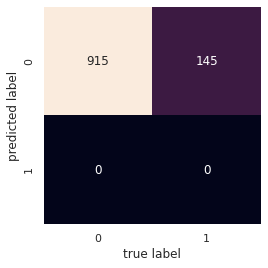

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

**No any sample has been classified as class 1!**


**So we now move onto GridSearchCV for the hyperparameter tuning:**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)   # find the best parameter combination and apply it to the model
grid.fit(X_train, y_train)                                          # fitting the model for grid search

In [ ]:
print(grid.best_params_)    # print best parameter after tuning
print('-'*90)  
print(grid.best_estimator_) # print how our model looks after hyper-parameter tuning


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
------------------------------------------------------------------------------------------
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_y_prediction = grid.predict(X_test)    # prediction of label for X_test
accuracy_score(y_test, grid_y_prediction)   # accuracy score of the model

0.8613207547169811

**We got an accuracy rate of 86.13%.**<br>
Let's see the classification report and the confusion matrix for the model:

In [ ]:
# CLASSIFICATION REPORT
print(classification_report(y_test, grid_y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       915
           1       0.45      0.06      0.11       145

    accuracy                           0.86      1060
   macro avg       0.66      0.53      0.52      1060
weighted avg       0.81      0.86      0.81      1060



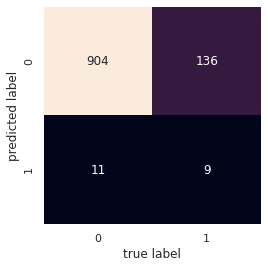

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, grid_y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

## We can try the model pipeline using the PCA and the SVC model.


### Choosing the number of components for the PCA

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

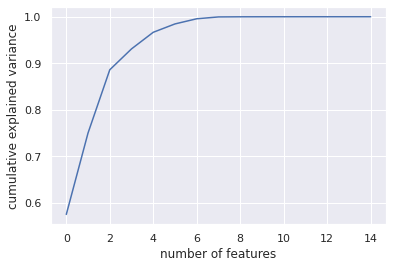

In [ ]:
pca = PCA().fit(X_framingham)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('cumulative explained variance');

**As we can see atmost 7 features are enough to explain the 100% cumulative variance.**

In [ ]:
pca = PCA(n_components=7, whiten=True, random_state=42)   # instantiation of PCA model with hyperparameter set
svc = SVC(kernel='rbf')                                   # instantiation of SVC model
model = make_pipeline(pca, svc)                           # making the model pipeline
model.fit(X_train, y_train)                               # fitting the data
y_prediction = model.predict(X_test)                      # prediction the label for the unknown data
accuracy_score(y_test, y_prediction)                      # calculating the accuracy

0.8650943396226415

**We got the whopping accuracy percent of 86.50% using this model. This was fast and accurate.**

Let's see the classification report and the confusion matrix for the model:

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       915
           1       0.62      0.03      0.07       145

    accuracy                           0.87      1060
   macro avg       0.75      0.52      0.50      1060
weighted avg       0.83      0.87      0.81      1060



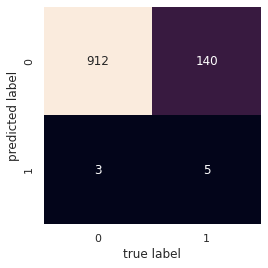

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

**This pipeline model consisting of PCA and SVC was a fast model which gave us an accuracy of 87% and the precision ratio for class 1 was 62% which is preety impressive than the rest.**

#Random Forest

In [ ]:
# we choose the default hyperparameter setting for now and observe the accuracy for it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()       # instantiation of Support Vector Machine model with default hyperparameter setting
model.fit(X_train, y_train)            # fit the data 
y_prediction = model.predict(X_test)   # prediction of for unknown data 
accuracy_score(y_test, y_prediction)   # calculation of accuracy score

0.8584905660377359

In [ ]:
model.get_params()        # these are the hyperparameter setting the model used as default

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Classification report:**

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       915
           1       0.38      0.06      0.10       145

    accuracy                           0.86      1060
   macro avg       0.62      0.52      0.51      1060
weighted avg       0.80      0.86      0.81      1060



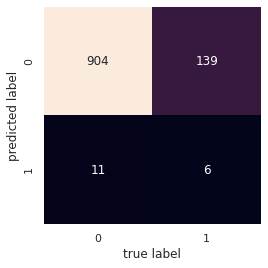

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Using default parameter of RandomForestClassfication, we got the accuracy of 85.84 %** , **but the precision ratio for class 1 is not so good.**

**Now we perform the hyper-parameter tuning using RandomizedSearchCV.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = RandomForestClassifier() 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1 )

# Fit the random search model
model_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

**This fitting of data took an average of 15 minutes. Let's calculate the accuracy of this model then.**

In [ ]:
y_prediction = model_random.predict(X_test)   # prediction using random search model
accuracy_score(y_test, y_prediction)          # calculation of accuracy score

0.8622641509433963

**We got the accuracy percent of 86.22 % using this model. This hyperparameter tuning took us about 15 minutes.**

Let's see the classification report and the confusion matrix for the model:

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       915
           1       0.44      0.03      0.05       145

    accuracy                           0.86      1060
   macro avg       0.66      0.51      0.49      1060
weighted avg       0.81      0.86      0.81      1060



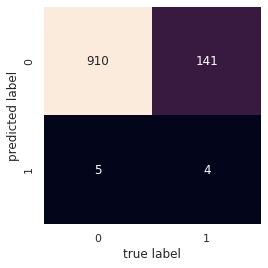

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

#LOGISTIC REGRESSSION

**Finally, we move onto the Logistic Regression**

In [ ]:
# instantiation of LogisticRegression model with max_iter set to 10000.
# default value is 100 which sadly gives error on our dataset

model = LogisticRegression(max_iter=10000)

**Now we perform the hyper-parameter tuning using RandomizedSearchCV.**

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# create regularization hyperparameter distribution using uniform distribution
C_space = uniform(loc=0, scale=4)   # uniform distribution between loc and loc + scale 


# Create hyperparameter options
hyperparameters = {'C':C_space, 
                   'penalty':penalty}

# Create randomized search 5-fold cross validation and 100 iterations
search_model = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = search_model.fit(X_train, y_train)

In [ ]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.7450408455106836


In [ ]:
y_prediction = best_model.predict(X_test)   # prediction 
accuracy_score(y_test, y_prediction)        # accuracy

0.8613207547169811

**Using LogisticRegression model, we got the accuracy of 86.13 %which is preety good.** <br>

**Now let's see the classification report and the Confusion matrix:**

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       915
           1       0.45      0.07      0.12       145

    accuracy                           0.86      1060
   macro avg       0.66      0.53      0.52      1060
weighted avg       0.81      0.86      0.81      1060



**The precision score for classes are not bad too**

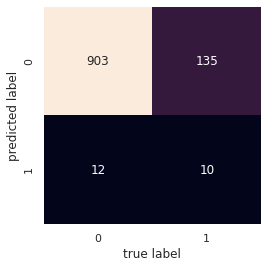

In [ ]:
# CONFUSION MATRIX
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Standout model for me:<br>
**The pipeline model consisting of PCA and SVC was the best and fastest performing model which gave us an accuracy of 87% and precision ratio for class 1 being 0.62(the highest among all)**
